In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 20 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [4]:
len(df)

1338

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

<AxesSubplot:>

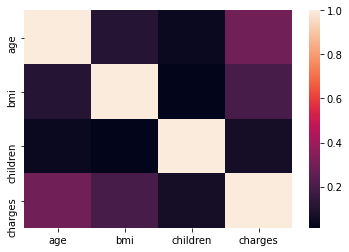

In [7]:
sns.heatmap(df.corr())

In [8]:
df.groupby("sex").size()

sex
female    662
male      676
dtype: int64

In [9]:
df.groupby("smoker").size()

smoker
no     1064
yes     274
dtype: int64

In [10]:
df.groupby("region").size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

In [11]:
df.groupby("children").size()

children
0    574
1    324
2    240
3    157
4     25
5     18
dtype: int64

<AxesSubplot:>

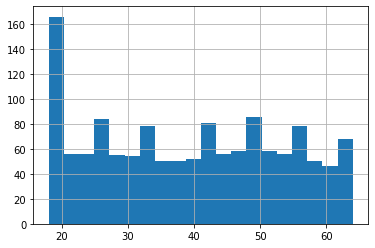

In [12]:
df['age'].hist(bins = 20)

In [13]:
age_category = []
for i in range (0, len  (df ['age'])):
    if df ['age'][i] <= 20:
        age_category.append ('A');
    elif 20 < df ['age'][i] <= 30:
        age_category.append ('B');
    elif 26 < df ['age'][i] <= 40:
        age_category.append ('C');
    elif 30 < df ['age'][i] <= 50:
        age_category.append ('D');
    elif 40 < df ['age'][i] <= 60:
        age_category.append ('E');
    else:
        age_category.append ('F');

In [14]:
age_df = pd.DataFrame (data = age_category, columns = ['AgeCategory'])

In [15]:
age_df.head(10)

,AgeCategory
0,A
1,A
2,B
3,C
4,C
5,C
6,D
7,C
8,C
9,E


In [16]:
updated_df= pd.concat([df, age_df], axis=1)

In [17]:
updated_df.head(10)

,age,sex,bmi,children,smoker,region,charges,AgeCategory
0,19,female,27.900,0,yes,southwest,16884.92400,A
1,18,male,33.770,1,no,southeast,1725.55230,A
2,28,male,33.000,3,no,southeast,4449.46200,B
3,33,male,22.705,0,no,northwest,21984.47061,C
4,32,male,28.880,0,no,northwest,3866.85520,C
5,31,female,25.740,0,no,southeast,3756.62160,C
6,46,female,33.440,1,no,southeast,8240.58960,D
7,37,female,27.740,3,no,northwest,7281.50560,C
8,37,male,29.830,2,no,northeast,6406.41070,C
9,60,female,25.840,0,no,northwest,28923.13692,E


<AxesSubplot:>

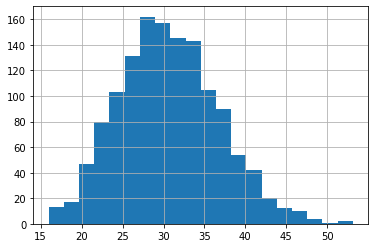

In [18]:
df['bmi'].hist(bins = 20)

In [19]:
bmi_category = []
for i in range (0, len  (df ['bmi'])):
    if df ['bmi'][i] < 20:
        bmi_category.append ('Underweight');
    elif 20 < df ['bmi'][i] <= 24.9:
        bmi_category.append ('Normal');
    elif 24.9 < df ['bmi'][i] <= 29.9:
        bmi_category.append ('Overweight');
    elif 29.9 < df ['bmi'][i] <= 34.9:
        bmi_category.append ('Obese');
    elif 34.9 < df ['bmi'][i] <= 60:
        bmi_category.append ('Extremely obese');
    else:
        age_category.append ('Abnormal');

In [20]:
bmi_df = pd.DataFrame (data = bmi_category, columns = ['BMICategory'])

In [21]:
bmi_df.head(15)

,BMICategory
0,Overweight
1,Obese
2,Obese
3,Normal
4,Overweight
5,Overweight
6,Obese
7,Overweight
8,Overweight
9,Overweight


In [22]:
bmi_df.groupby("BMICategory").size()

BMICategory
Extremely obese    319
Normal             201
Obese              397
Overweight         380
Underweight         41
dtype: int64

<AxesSubplot:xlabel='BMICategory', ylabel='count'>

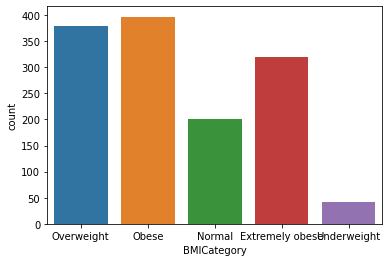

In [23]:
sns.countplot(x = "BMICategory", data = bmi_df)

From the visualisation above, we can see that most people fall under the obese category

In [24]:
update_df2= pd.concat([updated_df, bmi_df], axis=1)
update_df2.head(10)

,age,sex,bmi,children,smoker,region,charges,AgeCategory,BMICategory
0,19,female,27.900,0,yes,southwest,16884.92400,A,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,A,Obese
2,28,male,33.000,3,no,southeast,4449.46200,B,Obese
3,33,male,22.705,0,no,northwest,21984.47061,C,Normal
4,32,male,28.880,0,no,northwest,3866.85520,C,Overweight
5,31,female,25.740,0,no,southeast,3756.62160,C,Overweight
6,46,female,33.440,1,no,southeast,8240.58960,D,Obese
7,37,female,27.740,3,no,northwest,7281.50560,C,Overweight
8,37,male,29.830,2,no,northeast,6406.41070,C,Overweight
9,60,female,25.840,0,no,northwest,28923.13692,E,Overweight


<AxesSubplot:xlabel='children', ylabel='count'>

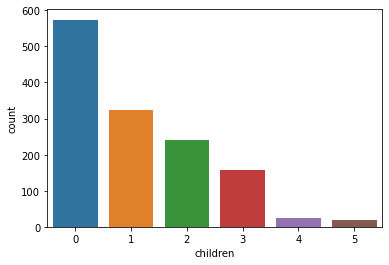

In [25]:
sns.countplot(x = "children", data = df)

<AxesSubplot:xlabel='region', ylabel='count'>

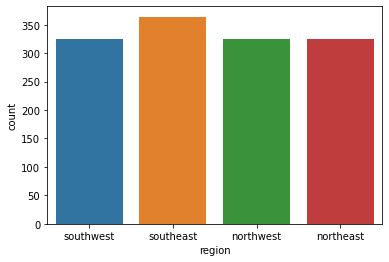

In [26]:
sns.countplot(x = "region", data = df)

<AxesSubplot:xlabel='smoker', ylabel='count'>

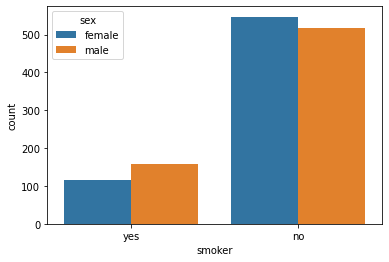

In [27]:
sns.countplot(x = "smoker", hue= "sex", data = df)

In [28]:
b_gender= pd.get_dummies(update_df2["sex"], drop_first=True)
b_gender.head()

,male
0,0
1,1
2,1
3,1
4,1


In [29]:
b_age= pd.get_dummies(update_df2["AgeCategory"])
b_age.head()

,A,B,C,D,E,F
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,1,0,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [30]:
b_bmi= pd.get_dummies(update_df2["BMICategory"])
b_bmi.head()

,Extremely obese,Normal,Obese,Overweight,Underweight
0,0,0,0,1,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,1,0,0,0
4,0,0,0,1,0


In [31]:
b_smoker= pd.get_dummies(update_df2["smoker"], drop_first=True)
b_smoker.head()

,yes
0,1
1,0
2,0
3,0
4,0


In [32]:
dummy_df = pd.concat([update_df2, b_age, b_bmi, b_gender, b_smoker], axis=1)
final_df = dummy_df.drop(columns= ["age", "bmi", "sex", "region", "BMICategory", "AgeCategory", "smoker"], axis = 1)
final_df.head()


,children,charges,A,B,C,D,E,F,Extremely obese,Normal,Obese,Overweight,Underweight,male,yes
0,0,16884.92400,1,0,0,0,0,0,0,0,0,1,0,0,1
1,1,1725.55230,1,0,0,0,0,0,0,0,1,0,0,1,0
2,3,4449.46200,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0,21984.47061,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,3866.85520,0,0,1,0,0,0,0,0,0,1,0,1,0


In [33]:
X= final_df.drop(["charges"], axis=1)
Y= final_df["charges"]

In [34]:
X.head()

,children,A,B,C,D,E,F,Extremely obese,Normal,Obese,Overweight,Underweight,male,yes
0,0,1,0,0,0,0,0,0,0,0,1,0,0,1
1,1,1,0,0,0,0,0,0,0,1,0,0,1,0
2,3,0,1,0,0,0,0,0,0,1,0,0,1,0
3,0,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [35]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

In [38]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

In [39]:
LR.fit(X_train,Y_train)

LinearRegression()

In [40]:
pred_Y = LR.predict(X_test)

In [41]:
pred_Y

array([14059.78187954,  7822.72914653, 35896.06417673, 16639.27318629,
        8731.09224453,  3321.12217977,  1291.16701654, 16455.30557079,
        9185.80554081,  9156.78339927,  4425.58271988,  8420.21810213,
        7822.72914653,  3350.1443213 , 26728.99447059,  9017.70705774,
        9419.09857125,  6638.22313646,  5736.75229972, 27595.48945263,
       34124.87891614, 14686.29297668, 13491.31506546, 30736.0426246 ,
        6040.73418085,  9133.32912656,  1309.53350146,  9185.80554081,
        4570.79653004, 11213.73810454,  6363.26339686, 38742.10795172,
       16639.27318629, 14633.81656243, 25537.36440339,  3247.21417844,
       12385.26174305, 31320.54920865, 32099.11901888,  4113.70916048,
        2633.11585305,  3218.19203691, 28052.57682218, 39339.59690733,
       28796.03523267,  7264.7342336 ,  9017.70705774,  7793.70700499,
        2624.05092531, 10045.60966839,  6069.75632239,  3083.63388336,
       31304.50943867, 39966.10800447, 14662.83870397,  7212.25781936,
      

In [42]:
from sklearn.metrics import r2_score
r2_score(Y_test, pred_Y)*100

82.62201913485193

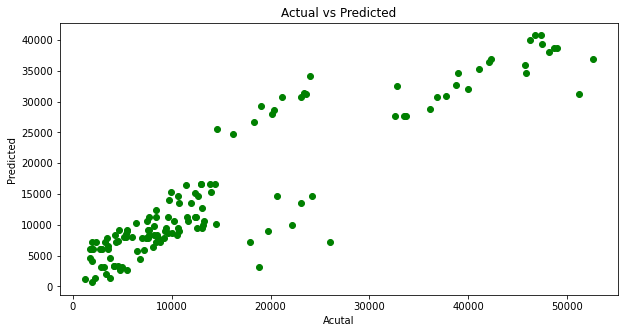

In [43]:
plt.figure(figsize=(10,5))
plt.scatter(Y_test, pred_Y, color='green')
plt.xlabel("Acutal")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

Using the features available in the given dataset

In [44]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [45]:
b_gender= pd.get_dummies(df["sex"])
b_gender.head()

,female,male
0,1,0
1,0,1
2,0,1
3,0,1
4,0,1


In [46]:
b_smoke= pd.get_dummies(df["smoker"])
b_smoke.head()

,no,yes
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [47]:
d_df = pd.concat([df, b_smoke, b_gender], axis=1)
f_df = d_df.drop(columns= ["sex", "region", "smoker"], axis = 1)
f_df.head()

,age,bmi,children,charges,no,yes,female,male
0,19,27.900,0,16884.92400,0,1,1,0
1,18,33.770,1,1725.55230,1,0,0,1
2,28,33.000,3,4449.46200,1,0,0,1
3,33,22.705,0,21984.47061,1,0,0,1
4,32,28.880,0,3866.85520,1,0,0,1


In [48]:
x= f_df.drop(["charges"], axis=1)
y= f_df["charges"]

In [49]:
x.head()

,age,bmi,children,no,yes,female,male
0,19,27.900,0,0,1,1,0
1,18,33.770,1,1,0,0,1
2,28,33.000,3,1,0,0,1
3,33,22.705,0,1,0,0,1
4,32,28.880,0,1,0,0,1


In [50]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=0)

In [53]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

In [54]:
LR.fit(x_train,y_train)

LinearRegression()

In [55]:
pred_y = LR.predict(x_test)

In [56]:
pred_y

array([11455.73507743,  9974.53899512, 37559.49016805, 15807.74426244,
        7060.04242221,  3698.75072887,  1185.92565326, 14062.00504447,
        8850.15213655,  7279.51050506,  4385.84955054, 10227.60208263,
        9117.55069583,  4394.25460356, 27586.00676161, 11279.77422593,
       11232.61064467,  5530.41777585,  8053.53904648, 26472.66545892,
       33478.76981906, 14092.59078685, 11255.70132583, 32527.97212067,
        4447.80549604,  8548.8859639 ,   962.44069386, 10217.34689488,
        4323.72647981, 10217.73340373,  8893.02623255, 40084.65390607,
       15761.58257594, 13946.13623533, 24417.77170595,  4741.68120608,
       12830.96738601, 30724.45002504, 33174.83609257,  3842.10537178,
        3790.2600769 ,  4441.15867479, 30003.338172  , 38999.85587838,
       27905.68171391,  4818.70821983, 11178.37612418,  7712.40338934,
        3358.76257237, 10867.96948992,  5087.85803473,  3305.34440223,
       33242.60641518, 37749.0360617 , 16176.15208924,  6489.16470353,
      

In [57]:
from sklearn.metrics import r2_score
r2_score(y_test, pred_y)*100

82.2373399514099

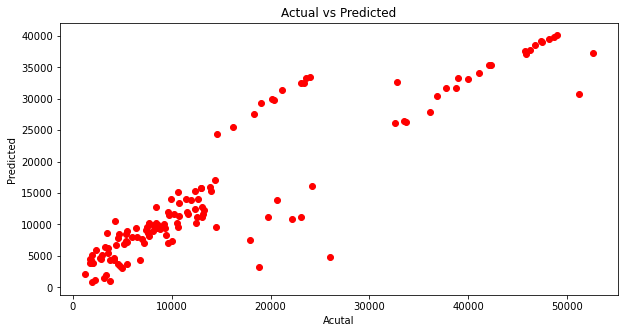

In [58]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, pred_y, color='red')
plt.xlabel("Acutal")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()